In [1]:
#-*- coding: utf-8 -*

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data_transac = pd.read_csv("transactions_cleaned.csv", encoding='utf-8')
data_cust = pd.read_csv("customers_cleaned.csv", encoding='utf-8')
data_prod = pd.read_csv("products_cleaned.csv", encoding='utf-8')

## Calcul du coéfficient de Gini

### Préparation du df

In [26]:
gens_achat = pd.merge(data_cust, data_transac, left_on="client_id", right_on="client_id", how='right')

#Merge left parce que certains id_prod ne sont pas du tout utilisés 
gens_achat = pd.merge(gens_achat, data_prod, left_on="id_prod", right_on="id_prod", how="left")

gens_achat = gens_achat[['session_id', 'price']]

gens_achat = gens_achat.groupby("session_id").sum()

gens_achat.head()

,price
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49


In [27]:
data_gini = gens_achat

#On enlève l'index afin de récupérer l'accés à la colonne 'price' par la suite : 
data_gini = data_gini.reset_index()
data_gini = data_gini["price"]

### Calcul

In [28]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort_values()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

print("Le coefficient de gini est de {}".format(gini(data_gini)))

Le coefficient de gini est de 0.009847658971537498


## Calcul de la courbe de Lorenz

In [29]:
#On calcule ensuite la cumsum():

data_lorenz = data_gini.cumsum() / data_gini.sum()
#data_lorenz = np.insert(data_lorenz, 0, 0)
#data_lorenz[0], data_lorenz[-1]
data_lorenz.head()

0    0.000002
1    0.000007
2    0.000013
3    0.000019
4    0.000026
Name: price, dtype: float64

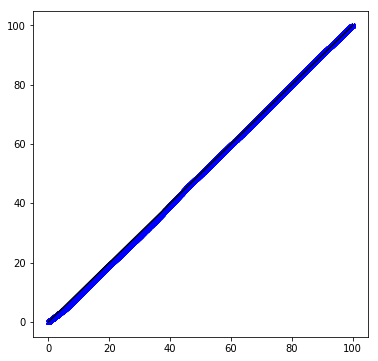

In [32]:
fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(data_lorenz.size)/(data_lorenz.size-1)*100, data_lorenz*100, 
           marker='x', color='blue', s=10)
## line plot of equality
ax.plot([0,100], [0,100], color='black')
plt.show()

#Cela revient à dire que 10% des achats reviennent à 10% du CA (à peu près, puisque coef de -0,016)

In [8]:
gens_achat = pd.merge(data_cust, data_transac, left_on="client_id", right_on="client_id", how='right')

#Merge left parce que certains id_prod ne sont pas du tout utilisés 
gens_achat = pd.merge(gens_achat, data_prod, left_on="id_prod", right_on="id_prod", how="left")

gens_achat = gens_achat[['client_id', 'price']]

gens_achat = gens_achat.groupby("price").count()

gens_achat.head()

,client_id
price,
0.62,14
0.66,8
0.77,3
0.81,7
0.88,3


In [9]:
#On définit notre df data_gini en ne prenant que id_prod et hour : 
data_gini = gens_achat

#On enlève l'index afin de récupérer l'accés à la colonne 'client_id' par la suite : 
data_gini = data_gini.reset_index()

In [10]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort_values()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

print("Le coefficient de gini est de {}".format(gini(data_gini['client_id'])))

Le coefficient de gini est de -0.11965097732618801


In [11]:
#On calcule ensuite la cumsum():
data_lorenz = data_gini.cumsum()

data_lorenz['client_id'] = data_lorenz['client_id'] / data_gini['client_id'].sum()

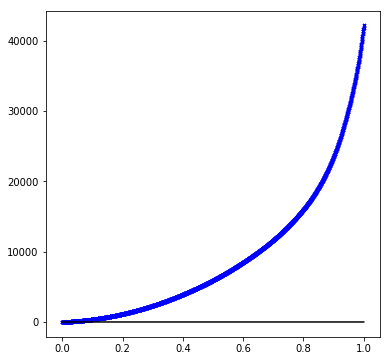

In [12]:
fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(data_lorenz['price'].size)/(data_lorenz['price'].size-1), data_lorenz['price'], 
           marker='x', color='blue', s=10)
## line plot of equality
ax.plot([0,1], [0,1], color='black')
plt.show()


KeyError: 'hour'

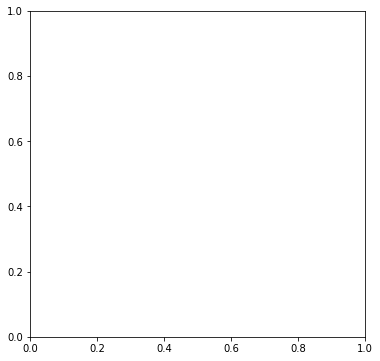

In [13]:
fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(data_lorenz['hour'].size)/(data_lorenz['hour'].size-1), data_lorenz['hour'], 
           marker='x', color='blue', s=100)
## line plot of equality
ax.plot([0,1], [0,275], color='k')

plt.savefig("Graphiques/courbe_de_lorenz.png")
#Revoir ce point, il serait intéressant d'avoir les heures en abscisse